# Classifictation Exercises

In [128]:
import pandas as pd
import numpy as np
from pydataset import data
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from env import get_db_url, username, password, host
import os
import acquire
import warnings
warnings.filterwarnings("ignore")

## Data Acquisition Exercises

PROBLEM 1 - 3: Are setup for repo.

PROBLEM 4: Create df, "df_iris". from pydata.
- 1) print the first 3 rows
- 2) print the number of rows and columns
- 3) print the column names
- 4) print the data type of each column
- 5) pirnt the summary statistics for each of the numeric variables

In [3]:
df_iris = data('iris')
# 1
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
#2
df_iris.shape

(150, 5)

In [5]:
#3
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
#4
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
#5
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


PROBLEM 5: Read the. Table1_CustDetails table from your speadcheet exercises google sheet into a dataframe named df_google_sheets. Make sure that the speadsheet is publicly visible under your sharing settings.
- 1) assign the frist 100 rows to a new dataframe 'df_google_sheets_sample'
- 2) print the number of rows of your original dataframe
- 3) print the first 5 columns
- 4) print the column names that have a data type of object
- 5) compute the range for each of the numeric variables

In [8]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1WvUo-ldhKSwoGgA4gJoRll9inH7pAl9Enq3witdltwQ/edit#gid=13162351'

In [9]:
csv_export_url = sheet_url.replace('/edit', '/export?format=csv')

In [10]:
df_google_sheets = pd.read_csv(csv_export_url)
df_google_sheets.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [11]:
#1
df_google_sheets_sample = df_google_sheets[0:100]
len(df_google_sheets_sample)

100

In [12]:
#2
len(df_google_sheets)

7049

In [13]:
#3
df_google_sheets.iloc[:,:5].head()

,customer_id,gender,is_senior_citizen,partner,dependents
0,0002-ORFBO,Female,0,Yes,Yes
1,0003-MKNFE,Male,0,No,No
2,0004-TLHLJ,Male,0,No,No
3,0011-IGKFF,Male,1,Yes,No
4,0013-EXCHZ,Female,1,Yes,No


In [14]:
df_google_sheets.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [15]:
#4
df_google_sheets.columns[df_google_sheets.dtypes == 'object']

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [16]:
df_google_sheets.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000


In [17]:
numeric_details = df_google_sheets[df_google_sheets.columns[(df_google_sheets.dtypes == 'int') | (df_google_sheets.dtypes == 'float')]]

In [18]:
range_numeric_details = numeric_details.max() - numeric_details.min()
# 5
range_numeric_details

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

PROMLEM 6: Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

- 1) assign the first 100 rows to a new dataframe, "df_excel_sample"
- 2) print the number of rows of your original dataframe
- 3) print the first 5 column names
- 4) print the column names that have a data type of object
- 5) compute the range for each of the numeric variables

In [19]:
df_excel = pd.read_excel('spreadsheet_exercises_Innis.xlsx')
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,267.40,Yes


In [20]:
#1
df_excel_sample = df_excel[0:100]
len(df_google_sheets_sample)

100

In [21]:
#2
len(df_excel)

7049

In [22]:
#3
df_excel.iloc[:,:5].head()

,customer_id,gender,is_senior_citizen,partner,dependents
0,0002-ORFBO,Female,0.0,Yes,Yes
1,0003-MKNFE,Male,0.0,No,No
2,0004-TLHLJ,Male,0.0,No,No
3,0011-IGKFF,Male,1.0,Yes,No
4,0013-EXCHZ,Female,1.0,Yes,No


In [23]:
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen    float64
partner               object
dependents            object
phone_service        float64
internet_service     float64
contract_type        float64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [24]:
#4
df_excel.columns[df_excel.dtypes == 'object']

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [25]:
df_excel.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000


In [26]:
numeric_details = df_excel[df_excel.columns[(df_excel.dtypes == 'int') | (df_excel.dtypes == 'float')]]
range_numeric_details = numeric_details.max() - numeric_details.min()
# 5
range_numeric_details

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

PROBLEM 7: Read the data from https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357 into a dataframe, 'df_google'
   
- 1) print the first 3 rows
- 2) print the number of rows and columns
- 3) print the column names
- 4) print the data type of each column
- 5) print the summary statistics for each of the numeric variables
- 6) print the unique values for each of your categorical variables

In [27]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [28]:
csv_export_url = sheet_url.replace('/edit', '/export?format=csv')

In [29]:
df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
#1
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [31]:
#2
df_google.shape

(891, 12)

In [32]:
#3
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
#4
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
#5
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
object_columns = df_google.columns[df_google.dtypes == 'object']

In [36]:
# 6
for cat in object_columns:
     print(f'{cat}\n\n{df_google[cat].value_counts()}\n')

Name

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

Sex

male      577
female    314
Name: Sex, dtype: int64

Ticket

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Cabin

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78          

In [37]:
# Example from class
df_google.select_dtypes('object').apply(lambda col : col.unique().tolist())

Name        [Braund, Mr. Owen Harris, Cumings, Mrs. John Bradley (Florence Briggs Thayer), Heikkin...
Sex                                                                                    [male, female]
Ticket      [A/5 21171, PC 17599, STON/O2. 3101282, 113803, 373450, 330877, 17463, 349909, 347742,...
Cabin       [nan, C85, C123, E46, G6, C103, D56, A6, C23 C25 C27, B78, D33, B30, C52, B28, C83, F3...
Embarked                                                                               [S, C, Q, nan]
dtype: object

## Acquire Functions

#1: Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [38]:
def get_titanic_data(use_cache=True):
    filename = 'titanic.csv'
    if os.path.exists(filename) and use_cache:
        print('Using cached csv file...')
        return pd.read_csv(filename)
    
    print('Getting a fresh copy from the database...')
    url = get_db_url('titanic_db')
    titanic_data = pd.read_sql('''
    SELECT *
    FROM passengers
    ''', url)
    
    print('Saving to csv...')
    titanic_data.to_csv(filename, index=False)
    return titanic_data

In [39]:
get_titanic_data(use_cache = False).head()

Getting a fresh copy from the database...
Saving to csv...


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


#2: Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [40]:
def get_iris_data(use_cache=True):
    filename = 'iris.csv'
    if os.path.exists(filename) and use_cache:
        print('Using cached csv file...')
        return pd.read_csv(filename)
    
    print('Getting a fresh copy from the database...')
    url = get_db_url('iris_db')
    iris_data = pd.read_sql('''
    SELECT *
    FROM species
    JOIN measurements
    USING(species_id)
    ''', url)
    
    print('Saving to csv...')
    iris_data.to_csv(filename, index=False)
    return iris_data

In [41]:
get_iris_data().head()

Using cached csv file...


,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


#3: Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join all 4 tables together, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [42]:
def get_telco_data(use_cache=True):
    filename = 'telco.csv'
    if os.path.exists(filename) and use_cache:
        print('Using cached csv file...')
        return pd.read_csv(filename)
    
    print('Getting a fresh copy from the database...')
    url = get_db_url('telco_churn')
    telco_data = pd.read_sql('''
    SELECT *
    FROM customers
    JOIN contract_types
    USING(contract_type_id)
    JOIN payment_types
    USING(payment_type_id)
    JOIN internet_service_types
    USING(internet_service_type_id)
    ''', url)
    
    print('Saving to csv...')
    telco_data.to_csv(filename, index=False)
    return telco_data

In [43]:
get_telco_data().head()

Using cached csv file...


,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


#4: Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

See Above.....

## Prepare Functions

Problem 1: Using the Iris Data:

Use the function defined in acquire.py to load the iris data.

In [44]:
iris = get_iris_data()
iris.head()

Using cached csv file...


,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


Drop the species_id and measurement_id columns.

In [45]:
drop_col = ['species_id','measurement_id']
iris = iris.drop(columns = drop_col)
iris.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2



Rename the species_name column to just species.


In [46]:
iris = iris.rename(columns={'species_name' : 'species'})
iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [47]:
dummy_name = pd.get_dummies(iris[['species']], dummy_na=False, drop_first=[True])
iris = pd.concat([iris,dummy_name],axis=1)
iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [48]:
def prep_iris(iris):
    
    drop_col = ['species_id','measurement_id']
    iris = iris.drop(columns = drop_col)
    
    iris = iris.rename(columns={'species_name' : 'species'})
    
    dummy_name = pd.get_dummies(iris[['species']], dummy_na=False, drop_first=[True])
    iris = pd.concat([iris,dummy_name],axis=1)
    
    return iris

In [49]:
iris = get_iris_data()
prep_iris(iris).head()

Using cached csv file...


,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


Problem 2: Using the Titanic dataset

Use the function defined in acquire.py to load the Titanic data.

In [50]:
titanic = get_titanic_data()
titanic.head()

Using cached csv file...


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


Drop any unnecessary, unhelpful, or duplicated columns.

In [51]:
titanic.select_dtypes('object').apply(lambda col: col.value_counts(dropna=False).tolist())

sex                                  [577, 314]
embarked                      [644, 168, 77, 2]
class                           [491, 216, 184]
deck           [688, 59, 47, 33, 32, 15, 13, 4]
embark_town                   [644, 168, 77, 2]
dtype: object

In [52]:
titanic.select_dtypes('object').apply(lambda col: col.unique().tolist())

sex                                       [male, female]
embarked                                  [S, C, Q, nan]
class                             [Third, First, Second]
deck                          [nan, C, E, G, D, A, B, F]
embark_town    [Southampton, Cherbourg, Queenstown, nan]
dtype: object

- Might be smart to eventually drop deck because of all the missing values

In [53]:
titanic.select_dtypes('number').apply(lambda col: col.value_counts(dropna=False).tolist())

passenger_id    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
survived                                                                                       [549, 342]
pclass                                                                                    [491, 216, 184]
age             [177, 30, 27, 26, 25, 25, 25, 24, 23, 22, 20, 18, 18, 18, 18, 17, 17, 15, 15, 15, 15, ...
sibsp                                                                        [608, 209, 28, 18, 16, 7, 5]
parch                                                                          [678, 118, 80, 5, 5, 4, 1]
fare            [43, 42, 38, 34, 31, 24, 18, 16, 15, 15, 15, 13, 13, 13, 12, 9, 9, 8, 8, 7, 7, 7, 7, 7...
alone                                                                                          [537, 354]
dtype: object

In [54]:
titanic.select_dtypes('number').apply(lambda col: col.unique().tolist())

passenger_id    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,...
survived                                                                                           [0, 1]
pclass                                                                                          [3, 1, 2]
age             [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 55.0, 31.0...
sibsp                                                                               [1, 0, 3, 4, 2, 5, 8]
parch                                                                               [0, 1, 2, 5, 3, 4, 6]
fare            [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26...
alone                                                                                              [0, 1]
dtype: object

In [55]:
drop_columns = ['class','embarked']
titanic = titanic.drop(columns=drop_columns)
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,NaN,Southampton,1


Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [56]:
dummy_name = pd.get_dummies(titanic[['sex','deck','embark_town']], dummy_na=False, drop_first=[True])
titanic = pd.concat([titanic,dummy_name],axis=1)
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone,sex_male,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,22.0,1,0,7.2500,NaN,Southampton,0,1,0,0,0,0,0,0,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0,0,0,1,0,0,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,NaN,Southampton,1,0,0,0,0,0,0,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,C,Southampton,0,0,0,1,0,0,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,NaN,Southampton,1,1,0,0,0,0,0,0,0,1


Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [57]:
def prep_titanic(titanic):
        
    drop_columns = ['passenger_id','class','embarked','deck']
    titanic = titanic.drop(columns=drop_columns)

    dummy_name = pd.get_dummies(titanic[['sex','embark_town']], dummy_na=False, drop_first=[True])
    titanic = pd.concat([titanic,dummy_name],axis=1)
    
    return titanic

In [58]:
titanic = get_titanic_data()
prep_titanic(titanic).head()

Using cached csv file...


,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1


Problem 3: Using the Telco dataset

Use the function defined in acquire.py to load the Telco data.

In [59]:
telco = get_telco_data()
telco.head()

Using cached csv file...


,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


In [60]:
telco.describe()

,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.872923,2.315633,1.690473,0.162147,32.371149,64.761692
std,0.737796,1.148907,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,2.000000,3.000000,2.000000,0.000000,55.000000,89.850000
max,3.000000,4.000000,3.000000,1.000000,72.000000,118.750000


In [61]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [62]:
telco.select_dtypes('object').apply(lambda col: col.unique().tolist())

customer_id              [0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKFF, 0013-EXCHZ, 0013-MHZWF, 0013-SMEOE, 0...
gender                                                                                              [Female, Male]
partner                                                                                                  [Yes, No]
dependents                                                                                               [Yes, No]
phone_service                                                                                            [Yes, No]
multiple_lines                                                                         [No, Yes, No phone service]
online_security                                                                     [No, Yes, No internet service]
online_backup                                                                       [Yes, No, No internet service]
device_protection                                                               

In [63]:
telco.select_dtypes('object').apply(lambda col: col.value_counts(dropna=False).tolist())

customer_id              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
gender                                                                                                [3555, 3488]
partner                                                                                               [3641, 3402]
dependents                                                                                            [4933, 2110]
phone_service                                                                                          [6361, 682]
multiple_lines                                                                                   [3390, 2971, 682]
online_security                                                                                 [3498, 2019, 1526]
online_backup                                                                                   [3088, 2429, 1526]
device_protection                                                               

In [64]:
telco.select_dtypes('number').apply(lambda col: col.unique().tolist())

internet_service_type_id                                                                                    [1, 2, 3]
payment_type_id                                                                                          [2, 1, 4, 3]
contract_type_id                                                                                            [2, 1, 3]
senior_citizen                                                                                                 [0, 1]
tenure                      [9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34, 1, 45, 50, 23, 55, 26, 69, 37, 49, 66,...
monthly_charges             [65.6, 59.9, 73.9, 98.0, 83.9, 69.4, 109.7, 84.65, 48.2, 90.45, 45.2, 116.8, 68.95, 10...
dtype: object

In [65]:
telco.select_dtypes('number').apply(lambda col: col.value_counts(dropna=False).tolist())

internet_service_type_id                                                                           [3096, 2421, 1526]
payment_type_id                                                                              [2365, 1612, 1544, 1522]
contract_type_id                                                                                   [3875, 1695, 1473]
senior_citizen                                                                                           [5901, 1142]
tenure                      [613, 362, 238, 200, 176, 170, 133, 131, 123, 119, 119, 117, 116, 110, 109, 100, 99, 9...
monthly_charges             [61, 45, 44, 44, 43, 43, 43, 40, 40, 39, 39, 38, 38, 37, 37, 35, 32, 31, 31, 30, 28, 2...
dtype: object

Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [66]:
drop_columns = ['internet_service_type_id','payment_type_id','contract_type_id']
telco = telco.drop(columns=drop_columns)
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [67]:
# change total charges to float type and add dummy variables below

In [68]:
dummy_name = pd.get_dummies(telco[['gender','partner','dependents','phone_service','multiple_lines',
                                   'online_security', 'online_backup','tech_support','streaming_tv', 
                                   'streaming_movies','paperless_billing','churn','contract_type',
                                   'payment_type','internet_service_type']], dummy_na=False, drop_first=[True])

telco = pd.concat([telco,dummy_name],axis=1)
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,1,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,0,0,0,0,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,1,1,0,0,0,1,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,1,1,0,0,0,1,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,0,1,1,0,0,0,0,1,1,0


Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [69]:
def prep_telco(telco):
    
    drop_columns = ['internet_service_type_id','payment_type_id','contract_type_id']
    telco = telco.drop(columns=drop_columns)
    
    dummy_name = pd.get_dummies(telco[['gender','partner','dependents','phone_service','multiple_lines',
                                       'online_security', 'online_backup','tech_support','streaming_tv', 
                                       'streaming_movies','paperless_billing','churn','contract_type',
                                       'payment_type','internet_service_type']], dummy_na=False, drop_first=[True])
    telco = pd.concat([telco,dummy_name],axis=1)
    
    return telco

In [70]:
telco = get_telco_data()
prep_telco(telco).head()

Using cached csv file...


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,1,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,0,0,0,0,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,1,1,0,0,0,1,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,1,1,0,0,0,1,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,0,1,1,0,0,0,0,1,1,0


## Exploratory Analysis Exercises

**Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:**

**Acquire, prepare & split your data.**

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [72]:
iris = get_iris_data()
iris.head()

Using cached csv file...


,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [73]:
iris = prep_iris(iris)
iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [74]:
train_validate, test = train_test_split(iris, test_size=0.2, random_state=123, stratify=iris.species)
train, validate = train_test_split(train_validate, test_size=0.3, random_state=123, stratify=train_validate.species)
f'Train: {train.shape}, Validate: {validate.shape}, Test: {test.shape}'

'Train: (84, 7), Validate: (36, 7), Test: (30, 7)'

**Univariate Stats: For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).**

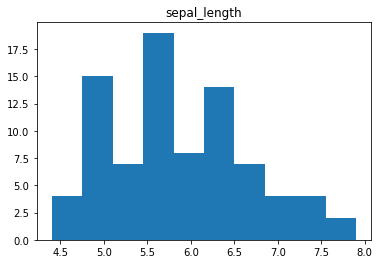

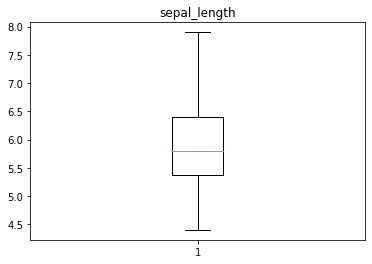

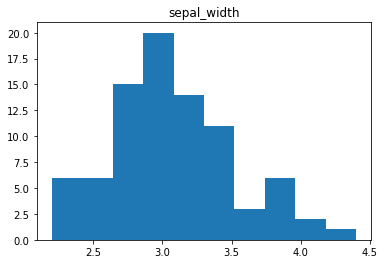

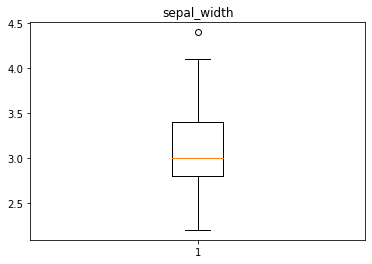

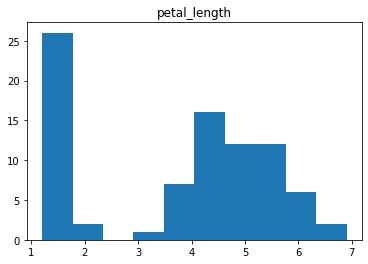

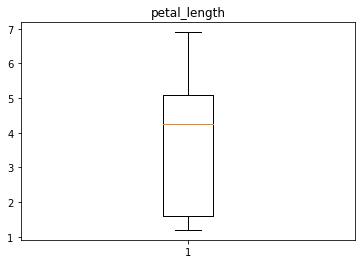

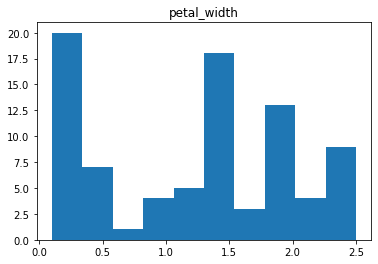

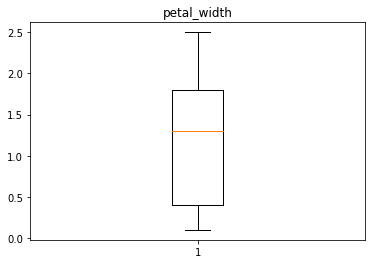

In [75]:
cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [89]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


**For each species (categorical variable): create a frequency table and a bar plot of those frequencies.**

In [79]:
object_columns = train.columns[train.dtypes == 'object']
for cat in object_columns:
     print(f'{cat}\n\n{train[cat].value_counts()}\n')

species

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64



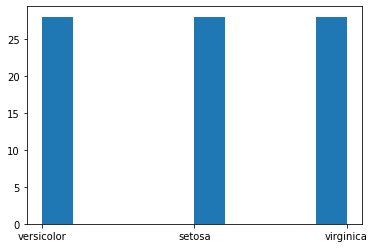

In [88]:
plt.hist(train.species)
plt.show()

In [78]:
train.isnull().sum()

species               0
sepal_length          0
sepal_width           0
petal_length          0
petal_width           0
species_versicolor    0
species_virginica     0
dtype: int64

***Document takeaways & any actions.**

The histograms for the numerical variables show a bimodal distribution for petal length which might indicate one of the species may be distinctly different from the others. Petal width is showimg a mulitmodal distribution that warrents further investigation.

**Bivariate Stats: Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).**

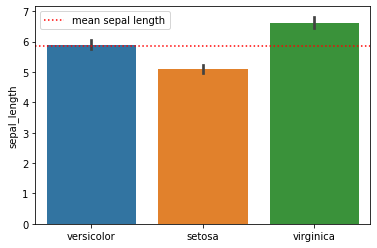

In [80]:
sns.barplot(x='species', y='sepal_length', data = train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label='mean sepal length', color = "red", linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

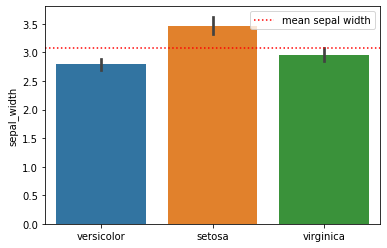

In [81]:
sns.barplot(x='species', y='sepal_width', data = train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label='mean sepal width', color = "red", linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

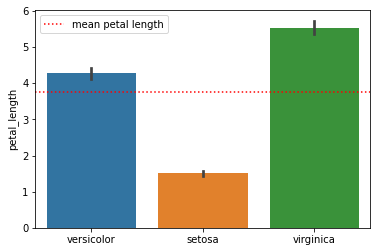

In [82]:
sns.barplot(x='species', y='petal_length', data = train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label='mean petal length', color = "red", linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

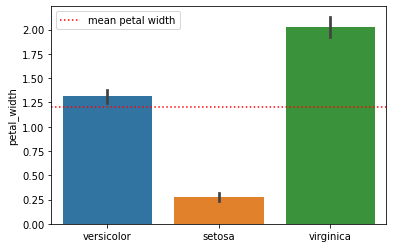

In [83]:
sns.barplot(x='species', y='petal_width', data = train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label='mean petal width', color = "red", linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

**For each measurement type, compute the descriptive statistics for each species.**

In [84]:
train[train.species == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,6.625000,2.960714,5.535714,2.021429,0.0,1.0
std,0.532378,0.318956,0.496815,0.293582,0.0,0.0
min,5.800000,2.200000,4.800000,1.500000,0.0,1.0
25%,6.300000,2.800000,5.100000,1.800000,0.0,1.0
50%,6.450000,3.000000,5.500000,2.000000,0.0,1.0
75%,6.900000,3.100000,5.800000,2.300000,0.0,1.0
max,7.900000,3.800000,6.900000,2.500000,0.0,1.0


In [85]:
train[train.species == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,5.896429,2.796429,4.271429,1.314286,1.0,0.0
std,0.425556,0.280848,0.409930,0.199470,0.0,0.0
min,4.900000,2.300000,3.300000,1.000000,1.0,0.0
25%,5.600000,2.600000,4.000000,1.200000,1.0,0.0
50%,5.800000,2.800000,4.250000,1.300000,1.0,0.0
75%,6.125000,3.000000,4.525000,1.500000,1.0,0.0
max,6.900000,3.400000,5.100000,1.800000,1.0,0.0


In [86]:
train[train.species == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,28.000000,28.000000,28.000000,28.00000,28.0,28.0
mean,5.089286,3.467857,1.507143,0.27500,0.0,0.0
std,0.360390,0.427788,0.184448,0.12057,0.0,0.0
min,4.400000,2.300000,1.200000,0.10000,0.0,0.0
25%,4.875000,3.275000,1.400000,0.20000,0.0,0.0
50%,5.000000,3.400000,1.500000,0.20000,0.0,0.0
75%,5.400000,3.800000,1.600000,0.40000,0.0,0.0
max,5.800000,4.400000,1.900000,0.60000,0.0,0.0


**For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.**

$H_0$: Virginica mean petal width are equal to or less than Versicolor

$H_α$: Virginica mean petal width are higher than Versicolor

In [166]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative = 'greater')
t, p

(767.0, 3.235595834904965e-10)

In [167]:
petal_sepal = ['petal_length', 'sepal_width', 'sepal_length']
for var in petal_sepal:
    t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative = "greater")
    print(f'Mann-Whitney Test between Virginica {var} and Versicolor {var}')
    print('\n')
    print(f' {t} , {p}')
    print('\n\n')

Mann-Whitney Test between Virginica petal_length and Versicolor petal_length


 776.5 , 1.4739917857575313e-10



Mann-Whitney Test between Virginica sepal_width and Versicolor sepal_width


 510.0 , 0.02628629569922847



Mann-Whitney Test between Virginica sepal_length and Versicolor sepal_length


 676.5 , 1.541014598267054e-06





**Document takeaways & any actions.**

- Sepal width and length don't have a big spread. Virginica comes in above average in sepal length while setosa comes in above average in width.
- Petal width and length show the biggest differences between species. Virginica have by far the largest petals, Versicolor comes in just above average on both and Setosa is far below average.

**Multivariate Stats: Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.**

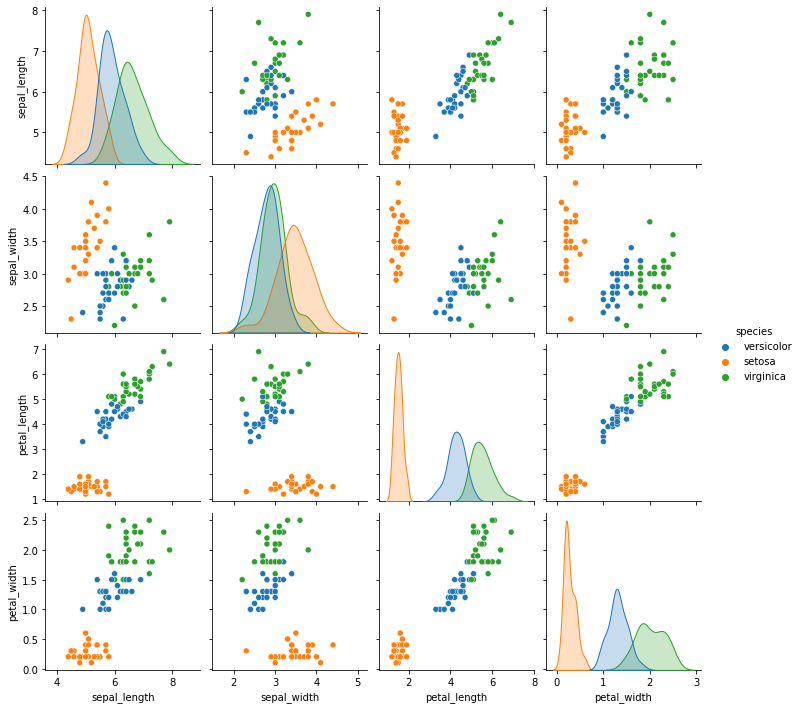

In [168]:
var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']
sns.pairplot(train[var],hue='species')

**Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col**

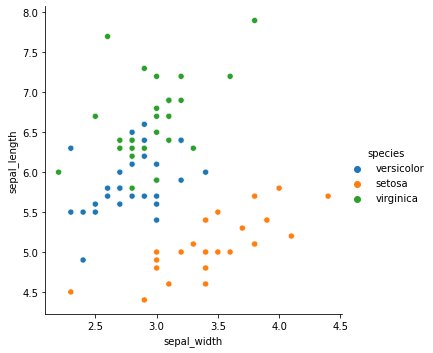

In [169]:
sns.relplot(data = train, x = 'sepal_width', y = 'sepal_length',hue = 'species')

**Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.**

<AxesSubplot:xlabel='measure_type', ylabel='measure'>

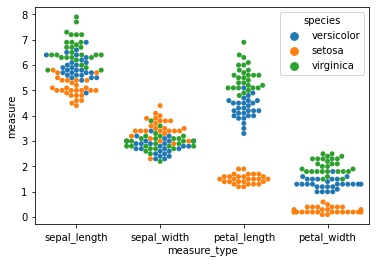

In [170]:
sns.swarmplot(x = 'measure_type', 
              y = 'measure', 
              data = train[var].melt(id_vars='species', 
                                var_name='measure_type',
                                value_name='measure'), 
              hue = 'species'
               )

**Ask a specific question of the data, such as:**
- **Is the sepal area signficantly different in virginica compared to setosa?** 
- **Answer the question through both a plot and using a mann-whitney or t-test.** 
- **If you use a t-test, be sure assumptions are met (independence, normality, equal variance).**

<AxesSubplot:xlabel='measure_type', ylabel='measure'>

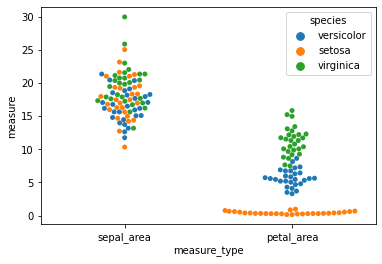

In [175]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

area = ['sepal_area','petal_area','species']
sns.swarmplot(x = 'measure_type', 
              y = 'measure', 
              data = train[area].melt(id_vars='species', 
                                var_name='measure_type',
                                value_name='measure'), 
              hue = 'species'
               )

$H_0$: Virginica mean sepal area are equal to or less than Setosa

$H_α$: Virginica mean sepal area are higher than Setosa


In [174]:
setosa = train[train.species == 'setosa']
virginica = train[train.species == 'virginica']

t, p = stats.mannwhitneyu(virginica.sepal_area, setosa.sepal_area, alternative = 'greater')

t, p

(524.0, 0.015574507053234803)

**Document takeaways and any actions.**

Petal area, petal width, petal length, and sepal length could all be useful. Sepal width and sepal area do not seem to be super useful. 

**Bonus Exercises Part I**

Explore your titanic dataset more completely.

Determine drivers of the target variable

Determine if certain columns should be dropped

Determine if it would be valuable to bin some numeric columns

Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

**Bonus Exercises Part II**
Explore your telco data to discover drivers of churn

Determine if certain columns should be dropped

Determine if it would be valuable to bin some numeric columns

Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.